In [1]:
import sys

sys.path.append('../../build')

In [2]:
import time
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import simpl as MySimplex
from simplicialx.simplicial import SimplicialComplex

In [4]:
games = []

with open("ten_games_bin_matrices.txt", "r") as file:
  games = []
  while True:
    description = file.readline()
    if description == "":
      break
    game = []
    while True:
      move = []
      while True:
        line = file.readline()
        if line == "Next turn\n":
          break
        move.append(list(map(int, line.split())))
      game.append(move)
      next = file.readline()
      if next == "End\n":
        break
    games.append(game)

In [5]:
my_simpl = MySimplex.SimplicialComplex()
other_simpl = SimplicialComplex()

In [6]:
def AddMineSimplex(my_simpl, simplex):
  my_simpl.AddSimplex(simplex)
      
def AddOtherSimplex(other_simpl, simplex):
  other_simpl.add(simplex)
  
def GetMovesCnt(game_index=0):
  return len(games[game_index])

def AddMineMove(game_index=0, game_move=0):
  my_simpl = MySimplex.SimplicialComplex()
  
  move = games[game_index][game_move]
  for figure in move:
    indices = [i for i, x in enumerate(figure) if x == 1]
    if indices != []:
      AddMineSimplex(my_simpl, indices)
  return my_simpl
  
def AddOtherMove(game_index=0, game_move=0):
  other_simpl = SimplicialComplex()
  
  move = games[game_index][game_move]
  for figure in move:
    indices = [i for i, x in enumerate(figure) if x == 1]
    if indices != []:
      AddOtherSimplex(other_simpl, indices)
  return other_simpl
     

In [7]:
for i, game in enumerate(games):
  print(f"Number of moves in {i}th, game: {GetMovesCnt(i)}")

Number of moves in 0th, game: 37
Number of moves in 1th, game: 72
Number of moves in 2th, game: 65
Number of moves in 3th, game: 102
Number of moves in 4th, game: 60
Number of moves in 5th, game: 41
Number of moves in 6th, game: 151
Number of moves in 7th, game: 149
Number of moves in 8th, game: 63
Number of moves in 9th, game: 59


In [8]:
for i in range(GetMovesCnt()):
  my_simpl = AddMineMove(0, i)
  print(my_simpl.FVector())

[(0, 14), (1, 22), (2, 15), (3, 6), (4, 1)]
[(0, 18), (1, 26), (2, 16), (3, 6), (4, 1)]
[(0, 19), (1, 27), (2, 21), (3, 10), (4, 2)]
[(0, 20), (1, 35), (2, 31), (3, 15), (4, 3)]
[(0, 23), (1, 50), (2, 43), (3, 20), (4, 4)]
[(0, 23), (1, 52), (2, 50), (3, 27), (4, 8), (5, 1)]
[(0, 28), (1, 70), (2, 87), (3, 65), (4, 30), (5, 8), (6, 1)]
[(0, 29), (1, 71), (2, 87), (3, 65), (4, 30), (5, 8), (6, 1)]
[(0, 29), (1, 86), (2, 158), (3, 205), (4, 184), (5, 112), (6, 44), (7, 10), (8, 1)]
[(0, 31), (1, 94), (2, 168), (3, 210), (4, 185), (5, 112), (6, 44), (7, 10), (8, 1)]
[(0, 30), (1, 99), (2, 177), (3, 215), (4, 186), (5, 112), (6, 44), (7, 10), (8, 1)]
[(0, 28), (1, 98), (2, 203), (3, 294), (4, 311), (5, 238), (6, 128), (7, 46), (8, 10), (9, 1)]
[(0, 30), (1, 107), (2, 262), (3, 520), (4, 800), (5, 925), (6, 792), (7, 495), (8, 220), (9, 66), (10, 12), (11, 1)]
[(0, 33), (1, 113), (2, 230), (3, 371), (4, 476), (5, 464), (6, 330), (7, 165), (8, 55), (9, 11), (10, 1)]
[(0, 33), (1, 136), (2, 3

In [20]:
%%time 
my_simpl = AddMineMove(0, 20)

CPU times: user 3.3 ms, sys: 1 µs, total: 3.3 ms
Wall time: 3.36 ms


In [21]:
%%time
other_simpl = AddOtherMove(0, 20)

CPU times: user 7.16 ms, sys: 466 µs, total: 7.62 ms
Wall time: 7.46 ms


In [63]:
other_simpl.f_vector

array([  33,  138,  353,  757, 1301, 1718, 1716, 1287,  715,  286,   78,
         13,    1])

In [22]:
my_simpl.FVector()

[(0, 33),
 (1, 129),
 (2, 248),
 (3, 296),
 (4, 236),
 (5, 128),
 (6, 46),
 (7, 10),
 (8, 1)]

Closeness

In [23]:
def ClosMine(p, q, w, game, move):
  my_simpl = AddMineMove(game, move)
  start = time.time()
  my_simpl.ClosenessAll(p, q, w)
  end = time.time()
  return end - start

In [24]:
def ClosOther(p, q, w, game, move):
  other_simpl = AddOtherMove(game, move)
  start = time.time()
  other_simpl.simplex_closeness_centrality(p, q, w)
  end = time.time()
  return end - start

In [29]:
x = np.arange(start=0, stop=12)

In [56]:
y1 = []
y2 = []

In [57]:
for k in x:
  mine_times = []
  other_times = []
  tmp = AddMineMove(0, 15)
  dim = tmp.Dimension()
  if dim <= k:
    continue
  t1 = ClosMine(k, k + 1, False, 0, 15)
  t2 = ClosOther(k, k + 1, False, 0, 15)
  print(k, t1, t2)
  y1.append(t1)
  y2.append(t2)

0 0.00037789344787597656 0.002321004867553711
1 0.004249095916748047 0.023941993713378906
2 0.046205997467041016 0.23476099967956543
3 0.33203601837158203 1.8357019424438477
4 1.1867146492004395 7.804441690444946
5 2.063901901245117 16.213125705718994
6 1.6673648357391357 17.992887020111084
7 0.5919020175933838 10.480658292770386
8 0.1032419204711914 2.5950238704681396
9 0.0071260929107666016 0.26987695693969727
10 0.0006072521209716797 0.014517068862915039
11 0.00023603439331054688 0.0009191036224365234


In [60]:
y1=[0.00037789344787597656,
 0.004249095916748047,
 0.046205997467041016,
 0.33203601837158203,
 1.1867146492004395,
 2.063901901245117,
 1.6673648357391357,
 0.5919020175933838,
 0.1032419204711914,
 0.0071260929107666016,
 0.0006072521209716797,
 0.00023603439331054688]

In [62]:
y2=[0.002321004867553711,
 0.023941993713378906,
 0.23476099967956543,
 1.8357019424438477,
 7.804441690444946,
 16.213125705718994,
 17.992887020111084,
 10.480658292770386,
 2.5950238704681396,
 0.26987695693969727,
 0.014517068862915039,
 0.0009191036224365234]

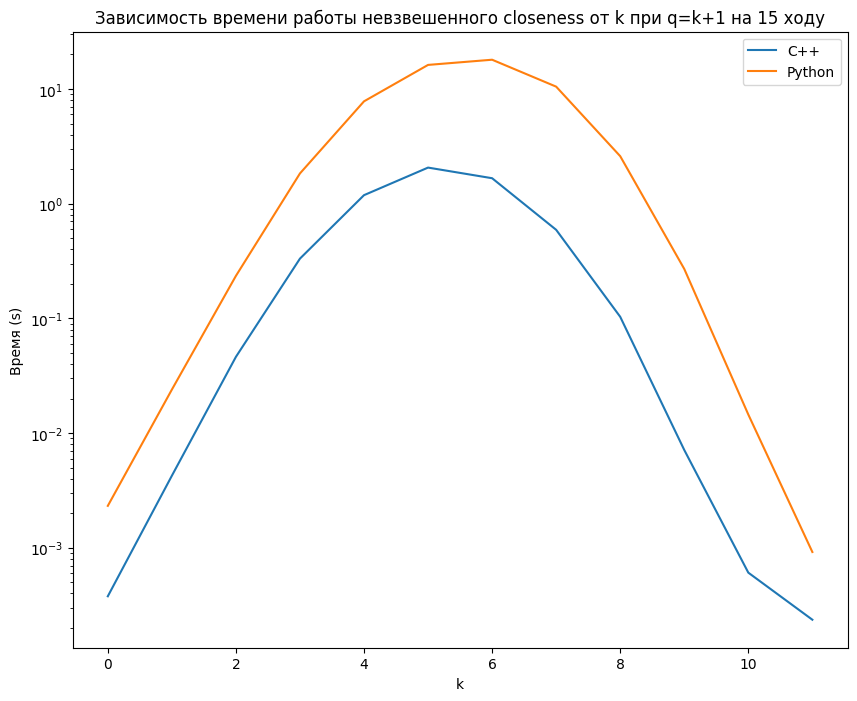

In [58]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени работы невзвешенного closeness от k при q=k+1 на 15 ходу')
plt.semilogy () 
plt.show()


In [ ]:
y1 = []
y2 = []

In [40]:
for k in x:
  mine_times = []
  other_times = []
  tmp = AddMineMove(0, 15)
  dim = tmp.Dimension()
  if dim <= k:
    continue
  t1 = ClosMine(k, k + 1, True, 0, 15)
  t2 = ClosOther(k, k + 1, True, 0, 15)
  print(k, t1, t2)
  y1.append(t1)
  y2.append(t2)

0 0.00047779083251953125 0.04087328910827637
1 0.004732847213745117 0.811654806137085
2 0.053243160247802734 7.959171772003174
3 0.38242411613464355 45.14887285232544
4 1.385930061340332 139.33396983146667
5 2.4664902687072754 220.90943384170532
6 1.9167978763580322 195.65912318229675
7 0.6796600818634033 92.52381896972656
8 0.11154794692993164 22.832385063171387
9 0.00851893424987793 2.6773760318756104
10 0.0006899833679199219 0.13978195190429688
11 0.00023293495178222656 0.0030379295349121094


In [43]:
y1 = [
  0.00047779083251953125,
  0.004732847213745117,
  0.053243160247802734,
  0.38242411613464355,
  1.385930061340332,
  2.4664902687072754,
  1.9167978763580322,
  0.6796600818634033,
  0.11154794692993164,
  0.00851893424987793,
  0.0006899833679199219,
  0.00023293495178222656]
y2 = [
  0.04087328910827637,
  0.811654806137085,
  7.959171772003174,
  45.14887285232544,
  139.33396983146667,
  220.90943384170532,
  195.65912318229675,
  92.52381896972656,
  22.832385063171387,
  2.6773760318756104,
  0.13978195190429688,
  0.0030379295349121094]

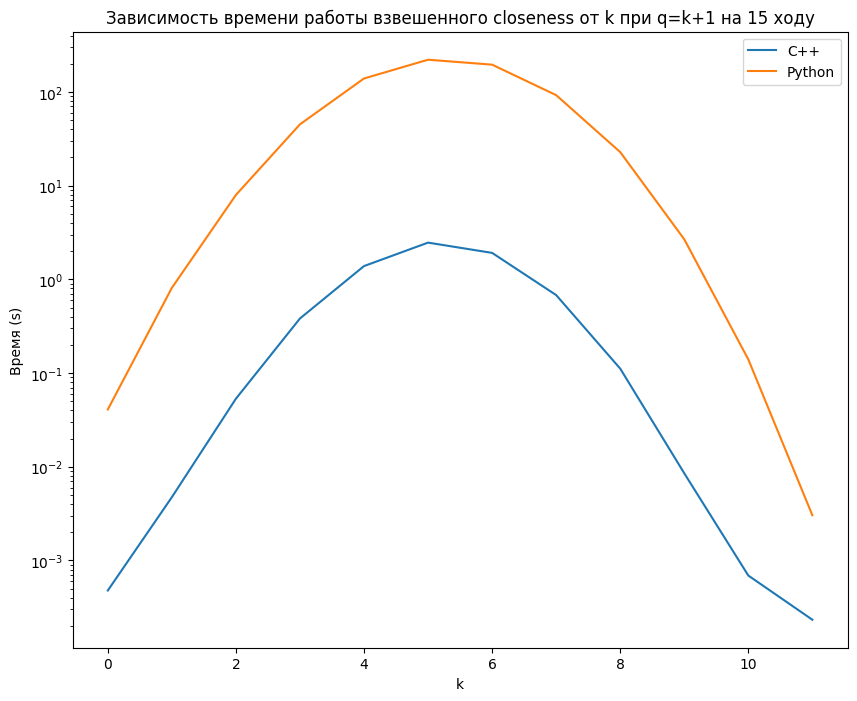

In [55]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени работы взвешенного closeness от k при q=k+1 на 15 ходу')
plt.semilogy () 
plt.show()


Betweenness

In [21]:
other_simpl = AddOtherMove(0, 13)
other_simpl.f_vector

array([ 33, 113, 230, 371, 476, 464, 330, 165,  55,  11,   1])

In [9]:
def BetwMine(p, q, w, game, move):
  my_simpl = AddMineMove(game, move)
  start = time.time()
  my_simpl.BetweennessAll(p, q, w)
  end = time.time()
  return end - start

In [10]:
def BetwOther(p, q, w, game, move):
  other_simpl = AddOtherMove(game, move)
  start = time.time()
  other_simpl.simplex_betweenness_centrality(p, q, w)
  end = time.time()
  return end - start

In [14]:
x = np.arange(start=0, stop=10)

In [15]:
y1 = []
y2 = []

In [16]:
for k in x:
  mine_times = []
  other_times = []
  tmp = AddMineMove(0, 13)
  dim = tmp.Dimension()
  if dim <= k:
    continue
  t1 = BetwMine(k, k + 1, False, 0, 13)
  t2 = BetwOther(k, k + 1, False, 0, 13)
  print(k, t1, t2)
  y1.append(t1)
  y2.append(t2)

0 0.002816915512084961 0.004553794860839844
1 0.03841876983642578 0.029499292373657227
2 0.5376486778259277 0.19074583053588867
3 3.861928939819336 1.0189287662506104
4 11.443188905715942 2.469099998474121
5 10.59510612487793 2.7400271892547607
6 3.4939630031585693 1.4062871932983398
7 0.38572216033935547 0.32712411880493164
8 0.012634754180908203 0.029815196990966797
9 0.00026702880859375 0.0012562274932861328


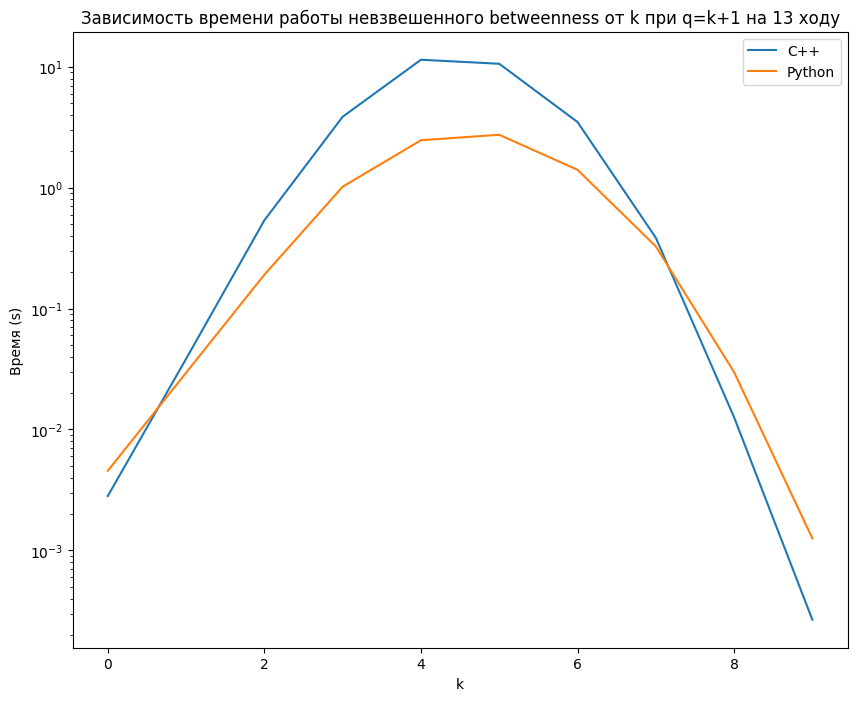

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени работы невзвешенного betweenness от k при q=k+1 на 13 ходу')
plt.semilogy () 
plt.show()


In [18]:
y1 = []
y2 = []

In [19]:
for k in x:
  mine_times = []
  other_times = []
  tmp = AddMineMove(0, 13)
  dim = tmp.Dimension()
  if dim <= k:
    continue
  t1 = BetwMine(k, k + 1, True, 0, 13)
  t2 = BetwOther(k, k + 1, True, 0, 13)
  print(k, t1, t2)
  y1.append(t1)
  y2.append(t2)

0 0.0032210350036621094 0.03203415870666504
1 0.04454994201660156 0.3676469326019287
2 0.4974660873413086 2.0564281940460205
3 3.7407147884368896 6.96171498298645
4 10.79241394996643 12.396968126296997
5 10.408860921859741 10.776162147521973
6 3.7491838932037354 4.641114711761475
7 0.4006991386413574 0.889045000076294
8 0.014139175415039062 0.07069897651672363
9 0.0002498626708984375 0.002173900604248047


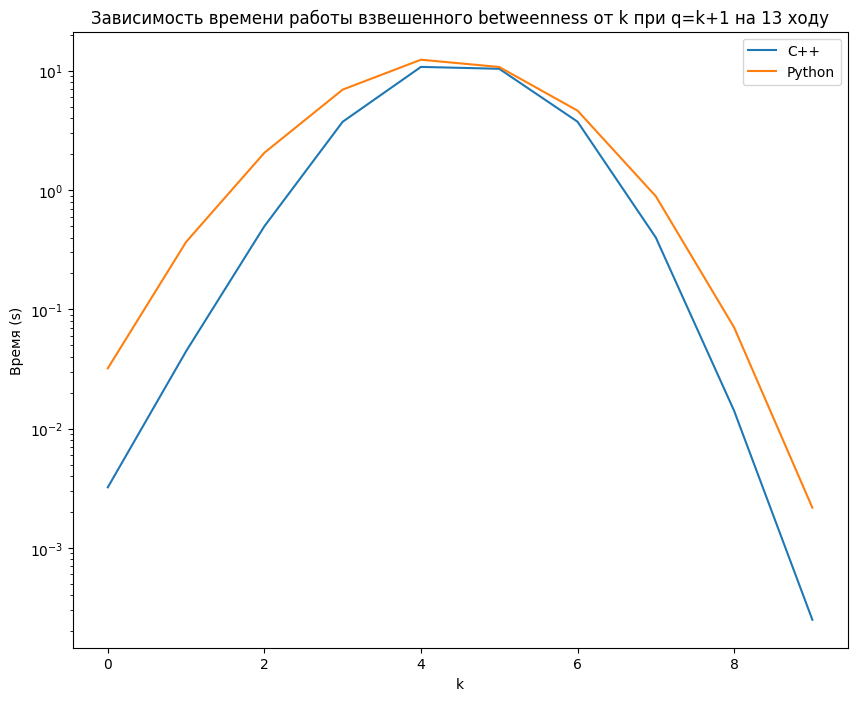

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени работы взвешенного betweenness от k при q=k+1 на 13 ходу')
plt.semilogy () 
plt.show()
